# 回帰分析

In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

# 単回帰

## 訓練データ生成

データを自作する場合

In [48]:
# n_sample = 100
# var = .2

# def linear_func(x):
#     return 2 * x + 5

# def add_noise(y_true, var):
#     return y_true + np.random.normal(scale=var, size=y_true.shape)

# def plt_result(xs_train, ys_true, ys_train):
#     plt.scatter(xs_train, ys_train, facecolor="none", edgecolor="b", s=50,  label="training data")
#     plt.plot(xs_train, ys_true, label="$2 x + 5$")
#     plt.legend()


sklearnのデータセットを利用する場合

In [ ]:
# ボストンの住宅データをbostonというインスタンスにインポート
from sklearn.datasets import load_boston
boston = load_boston()

# データの中身を確認
# カラム'target'は住宅価格であるから必ず正の値になる。業務などではこのあたりの確認(前処理)やデータの上限などの確認が重要。
print(boston['target'])
# > [24.  21.6 34.7 33.4 36.2 ... 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8 ... 11.9]

# データフレームの作成
# カラムに特徴量の名称、データにデータ内容を持つデータフレームを作成
df = DataFrame(data=boston.data, columns=boston.feature_names)

# 目的変数をDataFrameに追加
df['PRICE'] = np.array(boston.target)

# 最初の12行を出力
# ぱっと見でおかしなデータがないか確認してみる
df.head(12)

xs: (100,)
ys_true: (100,)
ys: (100,)


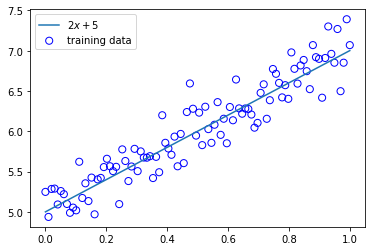

In [3]:
#データの作成
xs = np.linspace(0, 1, n_sample)
ys_true = linear_func(xs)
ys = add_noise(ys_true, var)

print("xs: {}".format(xs.shape))
print("ys_true: {}".format(ys_true.shape))
print("ys: {}".format(ys.shape))

#結果の描画
plt_result(xs, ys_true, ys)

## 学習

In [4]:
#numpy実装の回帰
def train(xs, ys):
    cov = np.cov(xs, ys, ddof=0)
    a = cov[0, 1] / cov[0, 0]
    b = np.mean(ys) - a * np.mean(xs)
    return cov, a, b

cov, a, b = train(xs, ys)
print("cov: {}".format(cov))
print("coef: {}".format(a))
print("intercept: {}".format(b))

cov: [[0.08501684 0.16957623]
 [0.16957623 0.38377358]]
coef: 1.9946194687154424
intercept: 5.027963264083799


In [6]:
#skl実装の回帰
from sklearn.linear_model import LinearRegression
model = LinearRegression()
reg = model.fit(xs.reshape(-1, 1), ys.reshape(-1, 1))

print("coef_: {}".format(reg.coef_))
print("intercept_: {}".format(reg.intercept_))

coef_: [[1.95061851]]
intercept_: [5.04439309]


## 予測

入力に対する値を$y(x) = a x + b$で予測する

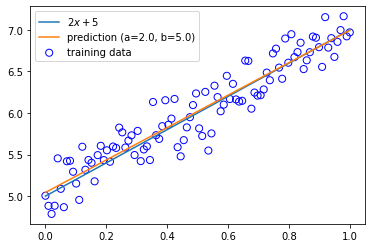

In [7]:
xs_new = np.linspace(0, 1, n_sample)
ys_pred = a * xs_new + b

plt.scatter(xs, ys, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(xs_new, ys_true, label="$2 x + 5$")
plt.plot(xs_new, ys_pred, label="prediction (a={:.2}, b={:.2})".format(a, b))
plt.legend()
plt.show()

# 多項式回帰

線形回帰モデルを用いて、部屋数が4で犯罪率が0.3の物件を考える。
ボストンの住宅データセット(UCI Machine Learning Repository: Housing Data Set)レコード数506カラム数14を用いる。

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [6]:
n_sample = 10
var = .25

def sin_func(x):
    return np.sin(2 * np.pi * x) 

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)

def plt_result(xs, ys_true, ys):
    plt.scatter(xs, ys,facecolor="none", edgecolor="b", s=50,  label="training data")
    plt.plot(xs, ys_true, label="$\sin(2\pi x)$")
    plt.legend()

xs: (10,)
ys_true: (10,)
ys: (10,)


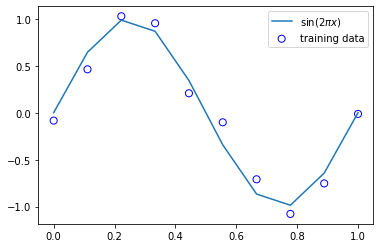

In [9]:
#データの作成
xs = np.linspace(0, 1, n_sample)
ys_true = sin_func(xs)
ys = add_noise(ys_true, var)

print("xs: {}".format(xs.shape))
print("ys_true: {}".format(ys_true.shape))
print("ys: {}".format(ys.shape))

#結果の描画
plt_result(xs, ys_true, ys)

## 学習

モデルとして以下を用いる。

$y(x) = \sum_{i=0}^{d} w_{i} x^{i} = \boldsymbol{w}^{\mathrm{T}} \boldsymbol{\phi(x)}$

ただし、$\boldsymbol{w}=[w_{0}, w_{1}, ..., w_{d}]^{\mathrm{T}}, \boldsymbol{\phi(x)} = [1, x, x^{2}, ..., x^{d}]^{\mathrm{T}}$である。

訓練データ$X, \boldsymbol{y}$に対しては
$\boldsymbol{y} = \Phi \boldsymbol{w}$と書ける。

ただし、$\Phi = [\boldsymbol{\phi}(x_{1}), \boldsymbol{\phi}(x_{2}),.., \boldsymbol{\phi}(x_{n})]^{\mathrm{T}}$である。

よって、最小化する目的関数は$L = ||\boldsymbol{y}  - \Phi \boldsymbol{w}||^2$と書け、

$\frac{\partial L}{\partial \boldsymbol{w}} = - 2 \Phi^{\mathrm{T}} (\boldsymbol{y} - \Phi \boldsymbol{w}) = 0$より、求める回帰係数$\boldsymbol{w}$は以下のように書ける。

$\hat{\boldsymbol{w}} = \left( \Phi^{\mathrm{T}} \Phi \right)^{-1}  \Phi^{\mathrm{T}} \boldsymbol{y}$

In [8]:
def polynomial_features(xs, degree=3):
    """多項式特徴ベクトルに変換
         X = [[1, x1, x1^2, x1^3],
                 [1, x2, x2^2, x2^3],
                   ...                             
                 [1, xn, xn^2, xn^3]]"""
    X = np.ones((len(xs), degree+1))
    X_t = X.T #(100, 4)
    for i in range(1, degree+1):
        X_t[i] = X_t[i-1] * xs
    return X_t.T

In [9]:
Phi = polynomial_features(xs)
Phi_inv = np.dot(np.linalg.inv(np.dot(Phi.T, Phi)), Phi.T)
w = np.dot(Phi_inv, ys)

## 予測

入力を多項式特徴ベクトル$\boldsymbol{\phi(x)}$に変換し、$y = \hat{\boldsymbol{w}} \boldsymbol{\phi(x)}\  (\boldsymbol{y}(x) = \Phi \hat{\boldsymbol{w}})$で予測する。

In [10]:
Phi_test = polynomial_features(xs)
ys_pred = np.dot(Phi_test, w)

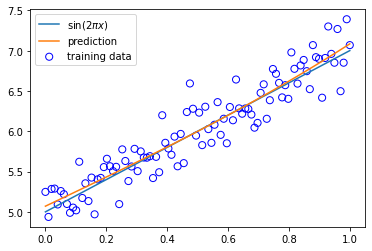

In [11]:
plt.scatter(xs, ys, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(xs, ys_true, label="$\sin(2\pi x)$")
plt.plot(xs, ys_pred, label="prediction")
# for i in range(0, 4):
#     plt.plot(xs, Phi[:, i], label="basis")
plt.legend()
plt.show()

# 重回帰分析

## 訓練データ生成 (3次元入力)

In [12]:
np.random.random((10, 3))

array([[0.25200305, 0.03487609, 0.54300263],
       [0.69524558, 0.81463033, 0.27825213],
       [0.95180409, 0.62969665, 0.98299005],
       [0.05109991, 0.96418259, 0.62584609],
       [0.38420031, 0.25149379, 0.61673057],
       [0.75552108, 0.43043918, 0.24381272],
       [0.63828005, 0.97024861, 0.31958234],
       [0.11248718, 0.94044905, 0.49579585],
       [0.27800078, 0.24207184, 0.79957902],
       [0.33126533, 0.90682656, 0.84046253]])

In [13]:
n_sample = 100
var = .2

def mul_linear_func(x):
    ww = [1., 0.5, 2., 1.]
    return ww[0] + ww[1] * x[:, 0] + ww[2] * x[:, 1] + ww[3] * x[:, 2]

def add_noise(y_true, var):
    return y_true + np.random.normal(scale=var, size=y_true.shape)
def plt_result(xs_train, ys_true, ys_train):
    plt.scatter(xs_train, ys_train, facecolor="none", edgecolor="b", s=50,  label="training data")
    plt.plot(xs_train, ys_true, label="$2 x + 5$")
    plt.legend()

In [38]:
x_dim = 3

X = np.random.random((n_sample, x_dim))
ys_true = mul_linear_func(X)
ys = add_noise(ys_true, var)
print(ys)

[2.15067544 2.41288085 2.26179315 3.5899606  1.86606099 2.11841015
 2.99184346 3.35104112 3.39664992 1.96068924 2.94820075 2.5450818
 2.32254529 2.92836197 1.95215574 2.4019212  2.06350377 2.53615938
 2.07921842 2.48506326 2.26532714 2.46637605 2.57219477 2.24218298
 3.26851578 2.8875826  3.54835179 3.28513847 3.51404416 2.98526193
 2.19277986 3.6016932  3.36045581 3.2833945  2.08607663 2.25260385
 3.8745881  3.14500168 2.55430305 2.22367881 3.02911214 2.93408045
 2.66149293 3.17427798 3.78806581 2.34173133 3.4049268  2.23613592
 3.55554558 2.6033914  3.34321309 1.94326123 2.61021425 2.18790323
 3.25697503 3.39755286 1.4944671  3.36435933 2.89006087 1.87671708
 3.35333798 3.27142693 3.93630473 3.37799309 3.15310787 1.5127322
 2.71805712 2.63399303 4.42048166 2.75790566 3.20528589 3.1286936
 3.01811392 2.30784976 2.31319369 3.00820293 2.64576021 3.49290079
 3.3137164  2.9784484  3.84224479 3.62777537 2.01165138 2.83654611
 2.99085696 2.47607668 2.04255594 1.93867818 2.07177666 2.8016181

## 学習

モデルとして以下を用いる。

$y(x) = \sum_{i=0}^{d} w_{i} x_{i} = \boldsymbol{w}^{\mathrm{T}}  \boldsymbol{x}$

ただし、陽には書かないが、$\boldsymbol{x}$には定数項のための$1$という要素があることを仮定する。

訓練データ$X, \boldsymbol{y}$に対しては$\boldsymbol{y} = X \boldsymbol{w}$と書ける。

よって、最小化する目的関数は$L = ||\boldsymbol{y}  - X \boldsymbol{w}||^2$と書け、

$\frac{\partial L}{\partial \boldsymbol{w}} = - 2 X^{\mathrm{T}} (\boldsymbol{y} - X \boldsymbol{w}) = 0$より、求める回帰係数$\boldsymbol{w}$は以下のように書ける。

$\hat{\boldsymbol{w}} = \left( X^{\mathrm{T}} X \right)^{-1}  X^{\mathrm{T}} \boldsymbol{y}$

In [45]:
def add_one(x):
    return np.concatenate([np.ones(len(x))[:, None], x], axis=1)

X_train = add_one(X)
pinv = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T)
w = np.dot(pinv, ys)

## 予測

入力に対する値を$y(x) = \hat{\boldsymbol{w}}^{\mathrm{T}}  \boldsymbol{x} \ (\boldsymbol{y} = X\hat{\boldsymbol{w}})$で予測する

## パラメータ推定結果

In [16]:
ww = [1., 0.5, 2., 1.]

In [46]:
for i in range(len(w)):
    print("w{0}_true: {1:>5.2}   w{0}_estimated: {2:>5.2}".format(i, ww[i], w[i]))

w0_true:   1.0   w0_estimated:   1.2
w1_true:   0.5   w1_estimated:  0.49
w2_true:   2.0   w2_estimated:   1.9
w3_true:   1.0   w3_estimated:  0.86
